# Data Money Company 

The company Data Money provides Analysis and Data Science consulting services to large companies in Brazil and abroad.
Its main market differentiator in relation to competitors is the high financial return for client companies, thanks to the performance of its Machine Learning algorithms.
Data Money believes that the expertise in training and fine-tuning algorithms, carried out by the company's Data Scientists, is the main reason for the excellent results that the consultancies have been delivering to their clients.

To continue growing the team's expertise, Data Scientists believe that it is extremely important to carry out tests on Machine Learning algorithms to acquire more and more experience on how they work and in which scenarios the performances are maximum and minimum, so that the choice of algorithm for each situation is the most correct possible.

As a newly hired Data Scientist for the company, your main task will be to carry out 3 trials with Classification, Regression and Clustering algorithms, in order to extract insights into how they work in certain scenarios and be able to convey this knowledge to the rest of the team.

# 0 - Imports

In [191]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn           as sns

from sklearn.metrics         import silhouette_score, adjusted_rand_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster         import KMeans, AffinityPropagation
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition   import PCA

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=UserWarning, module='numpy')

# 1 - Loading data

In [2]:
X_data = pd.read_csv('Data/Clustering/X_dataset.csv')
X_data.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


# 2 - EDA

In [43]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   ash_alcanity          178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  od280                 178 non-null    float64
 12  proline               178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


#### This dataset does not contain null values

In [44]:
X_data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,-8.382808e-16,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,3.154839e-01,0.220780,0.000000,0.170455,0.222332,0.462945,1.000000
ash,178.0,-8.170742e-16,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
ash_alcanity,178.0,-3.991813e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-3.991813e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,4.534870e-01,0.215811,0.000000,0.262931,0.474138,0.627586,1.000000
flavanoids,178.0,3.563860e-01,0.210730,0.000000,0.182489,0.378692,0.534810,1.000000
nonflavanoid_phenols,178.0,3.592632e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.197544e-16,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,3.991813e-17,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


#### This dataset is already normalized

# 3 - K-Means


Best Parameters: {'init': 'k-means++', 'n_clusters': np.int64(3), 'n_init': 10}
Best Silhouette Score: 0.2331


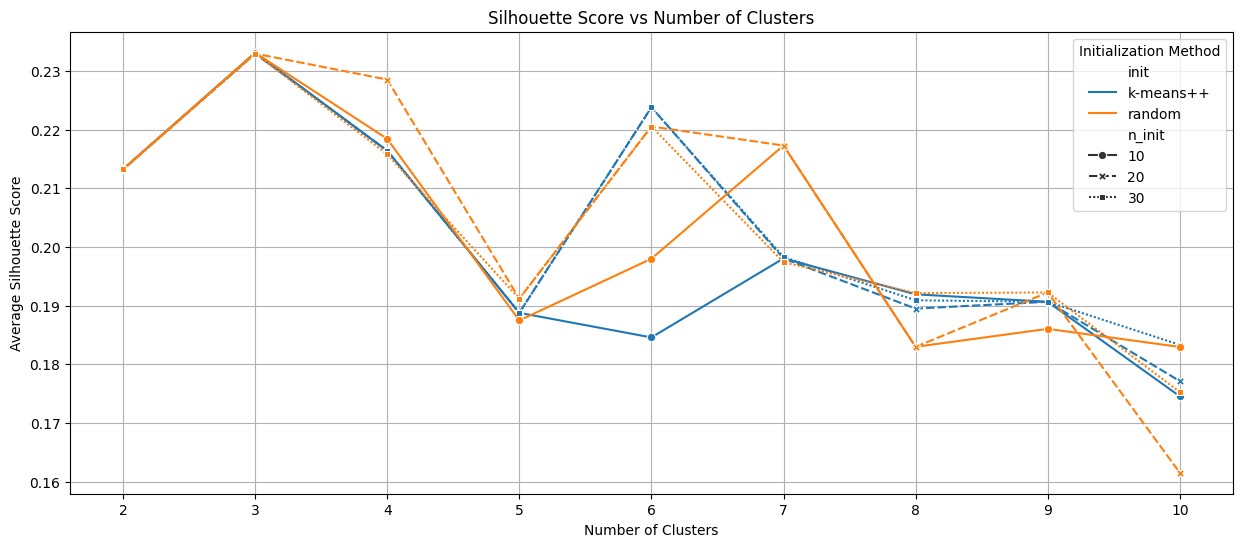

In [179]:
def perform_kmeans_grid_search(X_data, param_grid):
    """
    Perform a grid search for KMeans clustering and return the best parameters
    based on the highest silhouette score.

    Parameters:
    - X_data: The dataset to be clustered.
    - param_grid: Dictionary of parameters to be tested.

    Returns:
    - best_params: Dictionary of the best parameters.
    - best_ss: Best silhouette score.
    - best_labels: Labels from the best clustering result.
    """
    results = []
    best_params = best_ss = None

    for params in ParameterGrid(param_grid):
        kmeans = KMeans(random_state=0, **params)
        labels = kmeans.fit_predict(X_data)
        ss = silhouette_score(X_data, labels)
        
        results.append({**params, 'silhouette_score': ss})

        if best_ss is None or ss > best_ss:
            best_ss = ss
            best_params = params
            best_labels = labels

    # Print best parameters and silhouette score
    print(f"\nBest Parameters: {best_params}")
    print(f"Best Silhouette Score: {best_ss:.4f}")

    # Plot silhouette scores
    results_df = pd.DataFrame(results)
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=results_df, x='n_clusters', y='silhouette_score', hue='init', style='n_init', markers=True)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.legend(title='Initialization Method')
    plt.grid(True)
    plt.show()

    return best_params, best_ss, best_labels

# Define the parameter grid
param_grid = {
    'n_clusters': np.arange(2, 11),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30]
}

# Call the function with your dataset
kmeans_best_params, kmeans_best_ss, kmeans_best_labels = perform_kmeans_grid_search(X_data, param_grid)

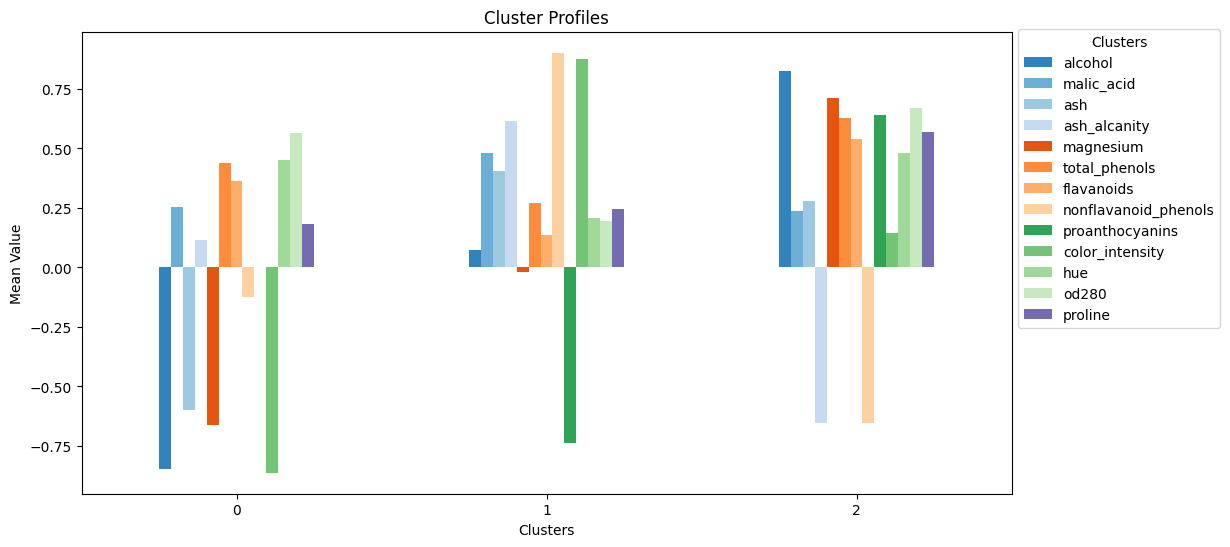

In [180]:
df_kmeans = X_data.copy()
df_kmeans['cluster'] = kmeans_best_labels

kmeans_cluster_profiles = df_kmeans.groupby('cluster').mean()
palette = sns.color_palette("tab20c", as_cmap=False)

# Gráfico de Barras
fig, ax = plt.subplots(figsize=(12, 6))
kmeans_cluster_profiles.plot(kind='bar', ax=ax, color=palette)
# cluster_profiles.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Mean Value')
plt.title('Cluster Profiles')
plt.legend(title='Clusters', bbox_to_anchor=(1, 1.02))
plt.xticks(rotation=0)
plt.show()

## Wine Cluster Analysis 🍷🥂

### To facilitate understanding, consultations were made with ChatGPT/Copilot to obtain a practical interpretation of the obtained result. 

### Cluster 0
- **Characteristics**:
  - **Low Alcohol Content**: These wines have less alcohol, resulting in a lighter taste.
  - **Rich in Antioxidants**: High levels of total phenols and flavonoids, which are good for health.
  - **Less Colorful**: These wines are visually lighter.

- **Suitable Occasions**:
  - **Outdoor Lunches**: Perfect for picnics or barbecues where light and refreshing wines are ideal.
  - **Casual Gatherings**: Great for relaxed get-togethers with friends and family.
  - **Pairing with Light Dishes**: Complements salads and light meals well.
  - **Everyday Drinking**: Suitable for casual, everyday drinking. Think of a relaxed evening with friends or a light lunch where you don’t want the wine to overpower the meal.

### Cluster 1
- **Characteristics**:
  - **High Acidity**: These wines have more malic acid, giving them a fresher and more acidic taste.
  - **More Colorful**: Visually vibrant wines.
  - **Distinct Chemical Composition**: High levels of non-flavonoid phenols and low levels of proanthocyanins.

- **Suitable Occasions**:
  - **Formal Dinners**: Ideal for pairing with sophisticated dishes like seafood or gourmet meals.
  - **Wine Tastings**: Great for events where a variety of flavors and colors are appreciated.
  - **Pairing with Acidic Dishes**: Complements dishes with a touch of acidity, like ceviche or salads with vinaigrette.
  - **Dinners with Strong Flavors**: These wines might pair well with dishes that have rich, creamy sauces or strong spices.

### Cluster 2
- **Characteristics**:
  - **High Alcohol Content**: These wines have more alcohol, resulting in a stronger taste.
  - **Rich in Minerals**: High levels of magnesium.
  - **Rich in Antioxidants**: High levels of total phenols and flavonoids.

- **Suitable Occasions**:
  - **Special Celebrations**: Perfect for toasting on special occasions like birthdays or holiday parties.
  - **Hearty Dinners**: Ideal for pairing with heavier dishes like red meats or rich sauces.
  - **Winter Nights**: Great for warming up on cold nights, providing a more intense and comforting flavor.
  - **Special Occasions**: These wines might be richer, with more body and a complex flavor profile, making them ideal for special occasions.

### Summary
- **Cluster 0**: Light and refreshing wines, ideal for casual occasions and light meals.
- **Cluster 1**: Acidic and vibrant wines, perfect for formal dinners and tastings.
- **Cluster 2**: Strong and intense wines, ideal for special celebrations and hearty dinners.


### Perform PCA


Best Parameters: {'init': 'k-means++', 'n_clusters': np.int64(3), 'n_init': 10}
Best Silhouette Score: 0.4112


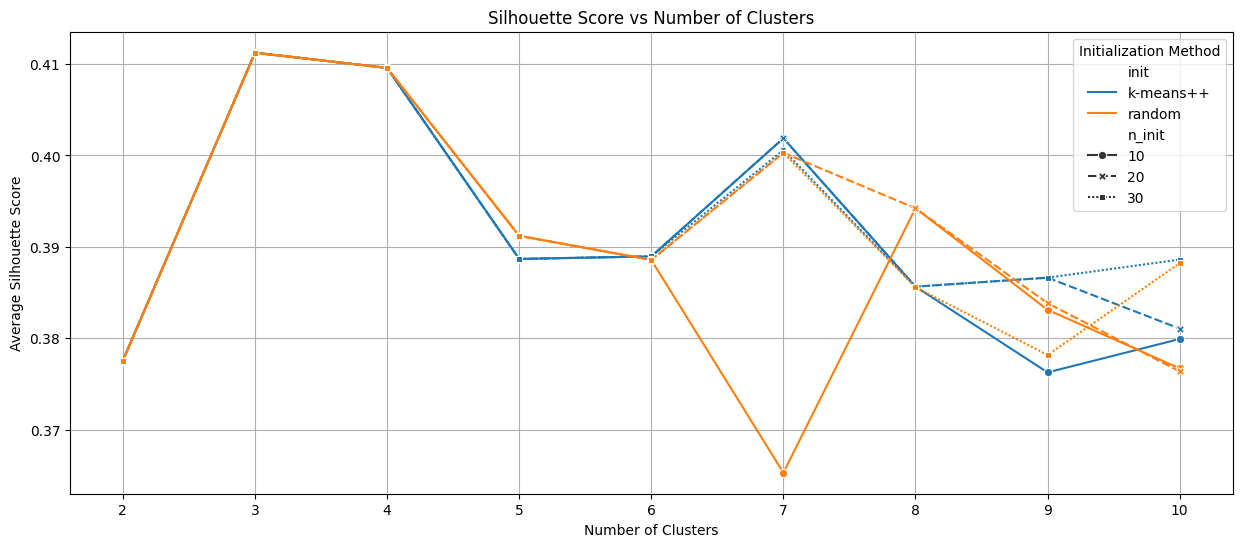

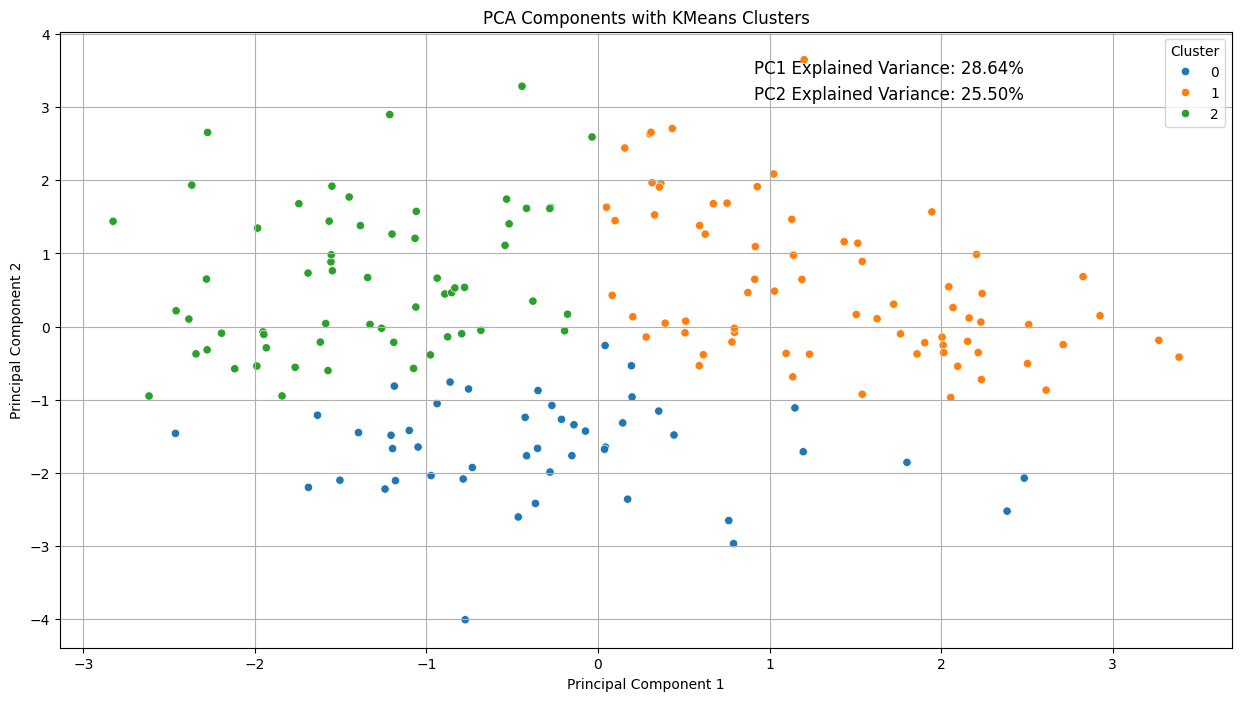

In [144]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_data)

# Define the parameter grid
param_grid = {
    'n_clusters': np.arange(2, 11),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30]
}

# Perform grid search
best_params, best_ss, best_labels = perform_kmeans_grid_search(X_pca, param_grid)

# Apply KMeans with the best parameters
kmeans = KMeans(n_clusters=best_params['n_clusters'], random_state=0)
clusters = kmeans.fit_predict(X_pca)

# Explained variance for PCA components
explained_variance = pca.explained_variance_ratio_

# Create DataFrame for visualization
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters
df_pca['Explained Variance PC1'] = explained_variance[0] * 100
df_pca['Explained Variance PC2'] = explained_variance[1] * 100

# Plot PCA components with clusters
plt.figure(figsize=(15.13, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    data=df_pca, 
    hue='Cluster',
    palette='tab10',  # Use a color palette with distinct colors for clusters
    legend='full'
)

# Add explained variance text
plt.text(
    df_pca['PC1'].max()*0.5, 
    df_pca['PC2'].max()*0.95, 
    f'PC1 Explained Variance: {explained_variance[0]*100:.2f}%', 
    fontsize=12, 
    ha='center'
)
plt.text(
    df_pca['PC1'].max()*0.5, 
    df_pca['PC2'].max()*0.85, 
    f'PC2 Explained Variance: {explained_variance[1]*100:.2f}%', 
    fontsize=12, 
    ha='center'
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Components with KMeans Clusters')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# 4 - Affinity Propagation


Best Preference: -210
Best Silhouette Score: 0.2238
N Clusters: 3


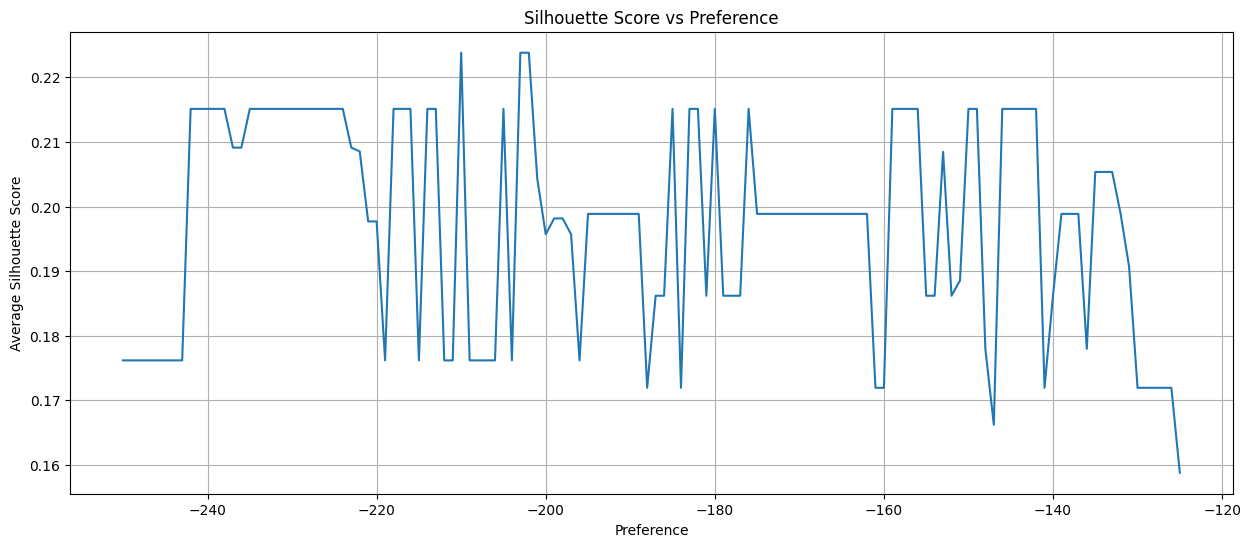

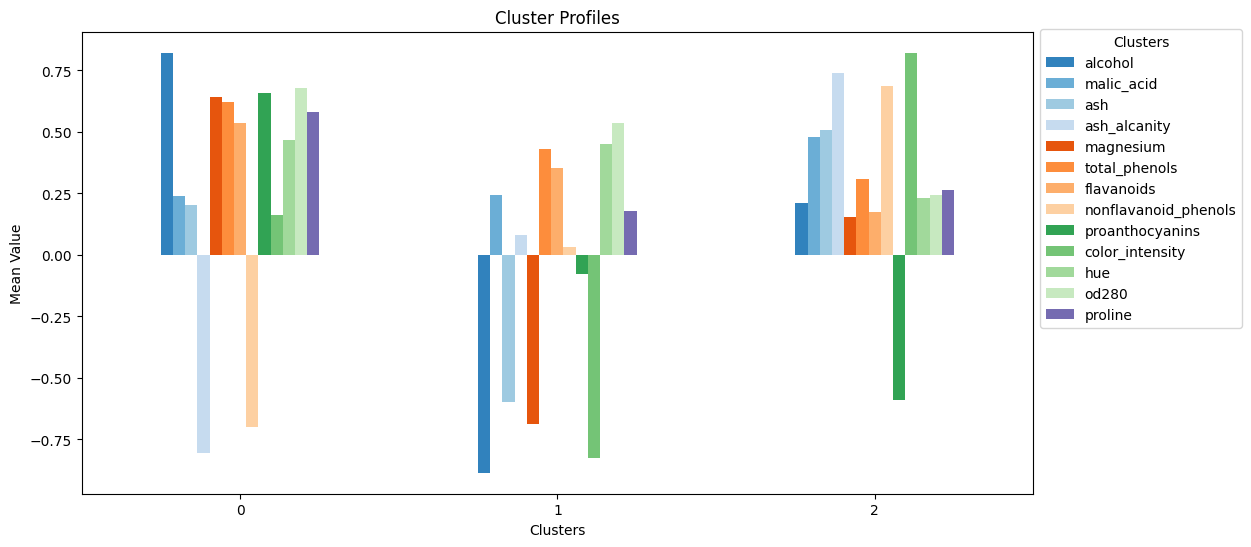

In [181]:
def perform_affinity_propagation_grid_search(X_data, preferences):
    """
    Perform a grid search for Affinity Propagation clustering with different preferences and return the best parameters
    based on the highest silhouette score.

    Parameters:
    - X_data: The dataset to be clustered.
    - preferences: List of preferences to be tested.

    Returns:
    - best_preference: The best preference value.
    - best_ss: Best silhouette score.
    - best_labels: Labels from the best clustering result.
    """
    results = []
    best_ss = -1
    best_labels = None
    best_preference = None

    for preference in preferences:
        affinity_propagation = AffinityPropagation(preference=preference, random_state=0)
        labels = affinity_propagation.fit_predict(X_data)
        
        # Check if the number of clusters is more than 1
        if len(set(labels)) > 1:
            ss = silhouette_score(X_data, labels)
            results.append({
                'preference': preference,
                'silhouette_score': ss
            })
            
            if ss > best_ss:
                best_ss = ss
                best_labels = labels
                best_preference = preference

        # print(f"Preference: {preference} - Silhouette Score: {ss:.4f}" if len(set(labels)) > 1 else f"Preference: {preference} - Skipped due to single cluster")

    # Print best parameters and silhouette score
    print(f"\nBest Preference: {best_preference}")
    print(f"Best Silhouette Score: {best_ss:.4f}")
    print(f'N Clusters: {len(np.unique(best_labels))}')

    # Plot silhouette scores
    results_df = pd.DataFrame(results)
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=results_df, x='preference', y='silhouette_score', markers=True)
    plt.xlabel('Preference')
    plt.ylabel('Average Silhouette Score')
    plt.title('Silhouette Score vs Preference')
    plt.grid(True)
    plt.show()

    return best_preference, best_ss, best_labels

# Define the preferences to be tested
preferences = range(-250,-124)

# Perform grid search
affinity_propagation_best_preference, affinity_propagation_best_ss, affinity_propagation_best_labels = perform_affinity_propagation_grid_search(X_data, preferences)

df_affinity_propagation = X_data.copy()
df_affinity_propagation['cluster'] = affinity_propagation_best_labels

affinity_propagation_cluster_profiles = df_affinity_propagation.groupby('cluster').mean()
palette = sns.color_palette("tab20c", as_cmap=False)

# Gráfico de Barras
fig, ax = plt.subplots(figsize=(12.28, 6))
affinity_propagation_cluster_profiles.plot(kind='bar', ax=ax, color=palette)
# cluster_profiles.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Mean Value')
plt.title('Cluster Profiles')
plt.legend(title='Clusters', bbox_to_anchor=(1, 1.02))
plt.xticks(rotation=0)
plt.show()

# 5 - Comparison between the results from the two methods 📊📈

Adjusted Rand Index (ARI): 0.7691838802303653



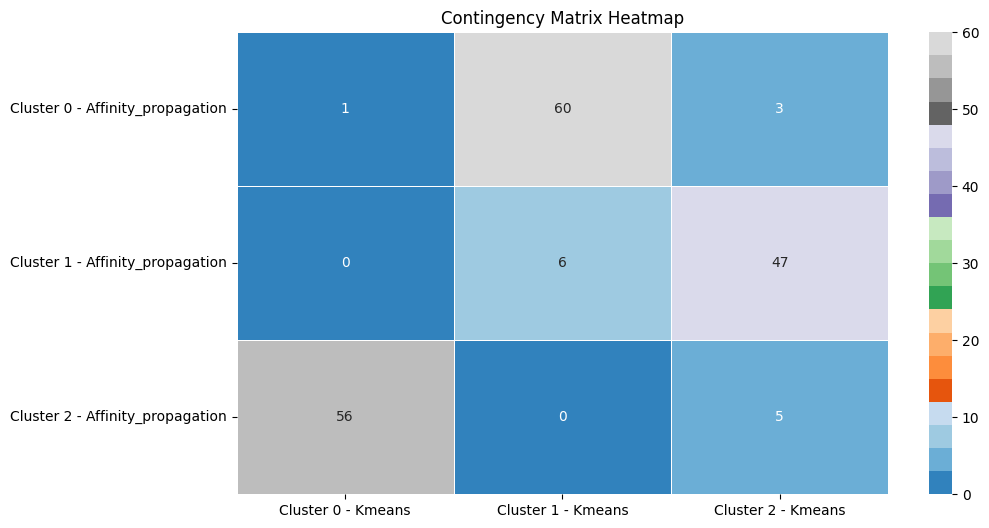

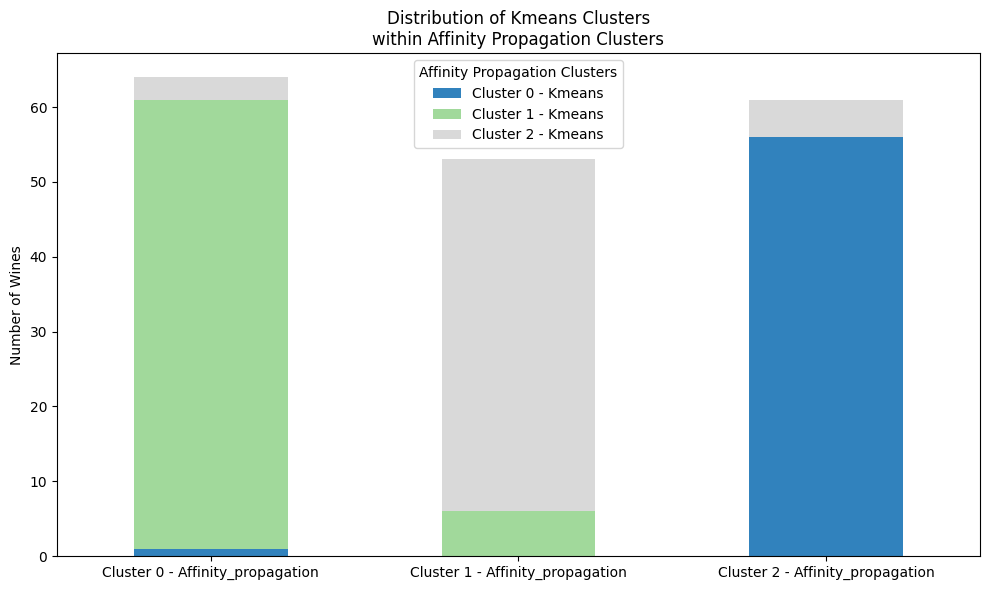

In [245]:
# Calculate the contingency matrix
contingency = contingency_matrix(kmeans_best_labels, affinity_propagation_best_labels)

# Calculate the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(kmeans_best_labels, affinity_propagation_best_labels)

print(f'Adjusted Rand Index (ARI): {ari}\n')

# Create a DataFrame from the contingency matrix
df_contingency = pd.DataFrame(contingency, columns=['Cluster 0 - Kmeans', 'Cluster 1 - Kmeans', 'Cluster 2 - Kmeans'],
                              index=['Cluster 0 - Affinity_propagation', 'Cluster 1 - Affinity_propagation', 'Cluster 2 - Affinity_propagation'])

# Create a heatmap from the contingency matrix
plt.figure(figsize=(10.51, 6))
sns.heatmap(df_contingency, 
            annot=True, 
            # cmap=sns.color_palette(custom_palette, as_cmap=True), 
            cmap='tab20c', 
            fmt='d', linewidths=0.5
           )
plt.title('Contingency Matrix Heatmap')
# plt.xlabel('Kmeans Clusters')
# plt.ylabel('Affinity Propagation Clusters')
plt.show()


# Configure the stacked bar chart
df_contingency.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6), 
                    colormap='tab20c')
plt.title('Distribution of Kmeans Clusters\nwithin Affinity Propagation Clusters')
# plt.xlabel('Kmeans Clusters')
plt.ylabel('Number of Wines')
plt.legend(title='Affinity Propagation Clusters')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

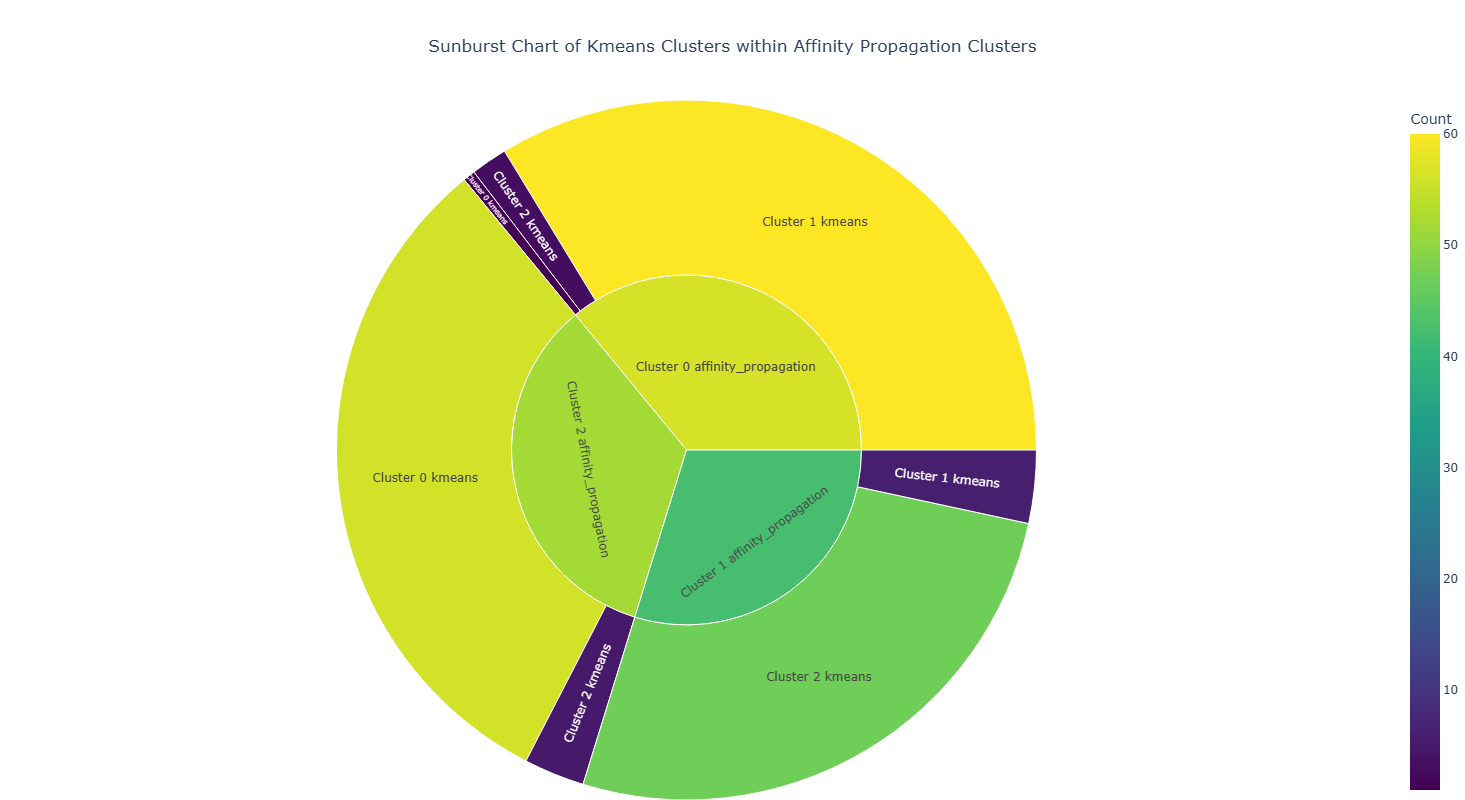

In [203]:
import plotly.express as px
import pandas as pd

# Ensure the DataFrame is correctly structured
sunburst_df = df_contingency.reset_index().melt(id_vars='index', var_name='Kmeans Cluster', value_name='Count')
sunburst_df = sunburst_df[sunburst_df['Count'] > 0]

sunburst_df.columns = ['Affinity Propagation Cluster', 'Kmeans Cluster', 'Count']

# Create a sunburst chart
fig = px.sunburst(sunburst_df, path=['Affinity Propagation Cluster', 'Kmeans Cluster'], values='Count', 
                  color='Count', color_continuous_scale='viridis')

# Update layout with specific height and title
fig.update_layout(
    title_text='Sunburst Chart of Kmeans Clusters within Affinity Propagation Clusters',  # Set the title text
    title_x=0.5,  # Center the title horizontally
    title_y=0.95,  # Adjust the vertical position of the title
    margin=dict(t=100, l=0, r=0, b=0),  # Add more margin on top to make room for the title
    height=800  # Adjust height as needed
)

fig.show()

## Results from the Contingency Matrix and ARI Index

**Contingency Matrix Heatmap:**
The heatmap gives us a visual representation of how the two clustering methods — **_K-means_** and **_Affinity Propagation_** — overlap in grouping the data. Darker shades in the heatmap show where there's a higher number of data points grouped together by both methods.

- **Key Takeaways:**
  - **Overlap Between Groups:** We see a strong overlap between Cluster 0 (K-means) and Cluster 2 (Affinity Propagation), as well as between Cluster 1 (K-means) and Cluster 0 (Affinity Propagation). This suggests that both methods agree quite well in grouping these data points.
  - **Moderate Agreement:** There's a moderate overlap between Cluster 2 (K-means) and Cluster 1 (Affinity Propagation), indicating some alignment between the methods, though not as strong as in the other clusters.

**Adjusted Rand Index (ARI):**
The ARI score of 0.769 suggests a high level of agreement between the two clustering methods. This is a good sign, indicating that both methods are identifying similar patterns in the data, making our clustering results more reliable.

**Distribution of K-means Clusters within Affinity Propagation Clusters:**
This bar chart breaks down how data points assigned to clusters by K-means are distributed within the clusters identified by Affinity Propagation.

- **Key Takeaways:**
  - **Strong Consistency:** Most of the data points in Cluster 0 (Affinity Propagation) are also classified into the same group by K-means, showing strong consistency between the methods.
  - **Diverse Grouping:** Cluster 1 (Affinity Propagation) has a mix of data points from different K-means clusters, suggesting that the two methods have some differences in how they group these points.
  - **Agreement:** Similar to Cluster 0, Cluster 2 (Affinity Propagation) shows a strong agreement with the K-means classification.

### Summary and Business Implications

These findings show that the two clustering methods we used are largely in agreement, which is a strong indicator that our data segmentation is reliable.

- **Consistency in Clustering:** The alignment between the two methods means that the identified groups are dependable and can be used for making strategic business decisions.
- **Actionable Insights:** With consistent clusters, we can confidently move forward with tailored strategies, whether it’s personalized marketing, enhancing customer experiences, or optimizing resources.
- **Understanding Your Customers:** As discussed earlier, understanding the characteristics of each cluster (e.g., rich and complex wines for special occasions, light and casual wines for everyday enjoyment) can guide product recommendations and improve customer satisfaction. 

This approach helps bridge the gap between data analysis and actionable business insights, making the results accessible and useful for decision-making.